# Importing all libraries


In [1]:
import tensorflow as tf
print(tf.__version__)

2.4.0


In [2]:
import keras
keras.__version__

'2.4.3'

In [3]:
import cv2

In [4]:
import os
import matplotlib.pyplot as plt
import numpy as np

# Importing one image from train dataset

In [5]:
import os
working_directory = os.getcwd()
print(working_directory)

/Users/vivekkannajayaprakash/Documents/Artificial Intelligence/Deep Learning/archive


In [6]:
img_array  = cv2.imread(working_directory + '/train/0/Training_3908.jpg')


In [7]:
img_array.shape

(48, 48, 3)

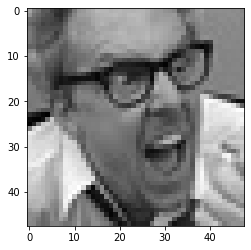

In [8]:
plt.imshow(img_array)

# Importing all images from train dataset

In [9]:
Datadirectory = ( 'train/')

In [10]:
Classes = ["0" , "1" , "2" , "3" , "4" , "5" , "6" ]

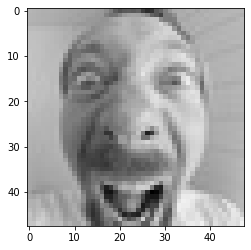

In [11]:
for category in Classes:
    path = os.path.join(Datadirectory , category)
    
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path , img))
        plt.imshow(cv2.cvtColor(img_array , cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break
               

# Resizing all images 

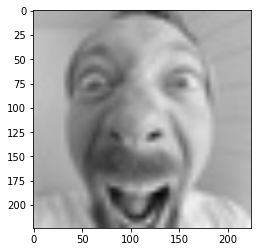

In [12]:
img_size = 224
new_array = cv2.resize(img_array , (img_size , img_size))
plt.imshow(cv2.cvtColor(new_array , cv2.COLOR_BGR2RGB))
plt.show()

In [13]:
new_array.shape

(224, 224, 3)

# Reading all the images and converting them to array

In [14]:
training_Data = []

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory , category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path , img))
                new_array = cv2.resize(img_array , (img_size ,img_size))
                training_Data.append([new_array , class_num])
            except Exception as e:
                pass

In [15]:
create_training_Data()

In [16]:
print(len(training_Data))

28709


In [17]:
# Converting list to array

temp = np.array(training_Data)

<ipython-input-17-995f352b2afb>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp = np.array(training_Data)


In [18]:
temp.shape

(28709, 2)

# Shuffling the dataset for correct training

In [19]:
import random 
random.shuffle(training_Data)

In [20]:
# data/feature
x = []  
# label
y = []

for features,label in training_Data:
    x.append(features)
    y.append(label)
    
x = np.array(x).reshape(-1 , img_size , img_size , 3)
    


In [21]:
x.shape

(28709, 224, 224, 3)

# Normalize the data

In [22]:
print(img_array)

[[[181 181 181]
  [179 179 179]
  [177 177 177]
  ...
  [182 182 182]
  [182 182 182]
  [182 182 182]]

 [[179 179 179]
  [178 178 178]
  [176 176 176]
  ...
  [179 179 179]
  [177 177 177]
  [175 175 175]]

 [[179 179 179]
  [178 178 178]
  [176 176 176]
  ...
  [173 173 173]
  [179 179 179]
  [185 185 185]]

 ...

 [[196 196 196]
  [181 181 181]
  [191 191 191]
  ...
  [230 230 230]
  [228 228 228]
  [205 205 205]]

 [[194 194 194]
  [186 186 186]
  [200 200 200]
  ...
  [227 227 227]
  [222 222 222]
  [233 233 233]]

 [[198 198 198]
  [197 197 197]
  [212 212 212]
  ...
  [226 226 226]
  [219 219 219]
  [243 243 243]]]


In [23]:
# To normalize we divide by the max number in the array (eg wherever 255 is black and 0 will be white)

x = x/255.0;

In [24]:
# converting list to array

y = np.array(y)

In [25]:
y.shape

(28709,)

# Deep learning model for training - transfer learing

In [26]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [27]:
model = tf.keras.applications.MobileNetV2()
# mobile net is a pretrained model

In [28]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

# Transfer learning - Tuning, weight will start from last check point.

In [29]:
base_input = model.layers[0].input

In [30]:
base_output = model.layers[-2].output

In [31]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [32]:
# Adding new layer after the output of gloabl pooling later
final_output  = layers.Dense(128)(base_output)
# Adding activation fucntion
final_output = layers.Activation("relu")(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation("relu")(final_output)
# Class is considered as 7
final_output = layers.Dense(7 , activation = "softmax")(final_output)

In [33]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

# Creating a model

In [34]:
new_model = keras.Model(inputs = base_input , outputs = final_output)

In [35]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

In [36]:
new_model.compile(loss = "sparse_categorical_crossentropy" , optimizer = "adam" , metrics = ["accuracy"])

In [37]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [38]:
new_model.fit(x,y , epochs = 20)

Epoch 1/20
898/898 [==============================] - 3274s 4s/step - loss: 1.3754 - accuracy: 0.4731
Epoch 2/20
898/898 [==============================] - 3232s 4s/step - loss: 1.0742 - accuracy: 0.5965
Epoch 3/20
898/898 [==============================] - 3229s 4s/step - loss: 0.9901 - accuracy: 0.6259
Epoch 4/20
898/898 [==============================] - 3261s 4s/step - loss: 0.9325 - accuracy: 0.6489
Epoch 5/20
898/898 [==============================] - 3294s 4s/step - loss: 0.8750 - accuracy: 0.6785
Epoch 6/20
898/898 [==============================] - 3296s 4s/step - loss: 0.8305 - accuracy: 0.6964
Epoch 7/20
898/898 [==============================] - 3309s 4s/step - loss: 0.7659 - accuracy: 0.7170
Epoch 8/20
898/898 [==============================] - 3221s 4s/step - loss: 0.7194 - accuracy: 0.7389
Epoch 9/20
898/898 [==============================] - 3211s 4s/step - loss: 0.6625 - accuracy: 0.7572
Epoch 10/20
898/898 [==============================] - 3182s 4s/step - loss: 0.597

In [57]:
new_model.save("/Users/vivekkannajayaprakash/Documents/Artificial Intelligence/Deep Learning/archive/my_model_64p35567.h5")

In [6]:
new_model = tf.keras.models.load_model("/Users/vivekkannajayaprakash/Documents/Artificial Intelligence/Deep Learning/archive/my_model_64p35567.h5")

In [7]:
new_model.evaluate

<bound method Model.evaluate of <tensorflow.python.keras.engine.functional.Functional object at 0x7fb3294961f0>>

In [8]:
# Test a image 

frame = cv2.imread("/Users/vivekkannajayaprakash/Documents/Artificial Intelligence/Deep Learning/archive/smiling-boy-260nw-34475098.jpg")

In [9]:
frame.shape


(280, 390, 3)

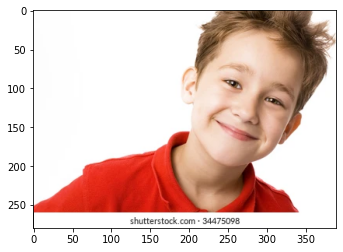

In [10]:
plt.imshow(cv2.cvtColor(frame , cv2.COLOR_BGR2RGB))

In [11]:
# we need face detection algotrithm

faceCascade =  cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [12]:
faceCascade

<CascadeClassifier 0x7fb32b1b7d30>

In [13]:
gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

In [14]:
gray.shape

(280, 390)

In [15]:

faces = faceCascade.detectMultiScale(gray,1.1,4)

for (x , y ,w , h ) in faces: 
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame ,(x,y),(x+w,y+h),(255,0,0),2)
    faces = faceCascade.detectMultiScale(roi_gray)
    
    if len(faces) ==0:
        print("face not detected")

    else:
        for (ex , ey , ew, eh) in faces:
            face_roi  = roi_color[ey: ey+eh , ex:ex +ew]
    

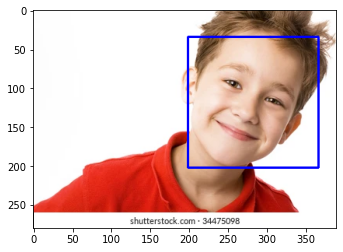

In [16]:
plt.imshow(cv2.cvtColor(frame , cv2.COLOR_BGR2RGB))

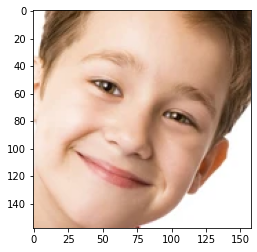

In [17]:
plt.imshow(cv2.cvtColor(face_roi , cv2.COLOR_BGR2RGB))

In [18]:
final_image  = cv2.resize(face_roi  , (224 , 224))
final_image = np.expand_dims(final_image , axis = 0)
final_image = final_image/255.0

In [19]:
Predictions = new_model.predict(final_image)


In [20]:
Predictions[0]

array([7.26308144e-06, 7.52562457e-09, 2.66664400e-04, 8.87134671e-01,
       1.11327335e-01, 1.23708602e-03, 2.69423181e-05], dtype=float32)

In [21]:
np.argmax(Predictions)

3

In [22]:
import cv2 # pip install opencv-python
#pip install opencv-contrib-python full package
#from deepface import DeepFace #pip install deepface
path = "haarcascade_frontalface_default.xml"
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN



#set the rectangle background to white
rectangle_bgr = (255, 255, 255)
#make a black image
img = np.zeros((500, 500))
#set some text
text = "Some text in a box!"
# get the width and height of the text box
(text_width, text_height) = cv2.getTextSize(text, font, fontScale=font_scale, thickness=1)[0]
# set the text start position
text_offset_x = 10
text_offset_y = img.shape[0] - 25
#make the coords of the box with a small padding of two pixels
box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height - 2))
cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0, 0, 0), thickness=1)



cap = cv2.VideoCapture(0)
# Check if the webcam is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
    
    
while True:
    ret, frame = cap.read()
    #eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        facess = faceCascade.detectMultiScale(roi_gray)
        if len(facess) == 0:
            print("Face not detected")
        else:
            for (ex,ey,ew,eh) in facess:
                face_roi = roi_color[ey: ey+eh, ex:ex + ew] ## cropping the face
    
    final_image = cv2.resize(face_roi, (224,224))
    final_image = np.expand_dims(final_image,axis=0) ## need fourth dimension
    final_image = final_image/255.0
    
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    Predictions = new_model.predict(final_image)
    
    font_scale = 1.5
    font = cv2.FONT_HERSHEY_PLAIN
    
    if(np.argmax(Predictions)==0):
        status = "Angry"
        x1,y1,w1,h1 = 0,0,175,75
        #Draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
        
        #Addd text
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        
        cv2.putText(frame, status,(100,150),font, 3,(0, 0, 255),2,cv2.LINE_4)
        
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 0, 255))
        
        
    elif (np.argmax(Predictions)==1):
        status = "Disgust"
        x1,y1,w1,h1 = 0,0,175,75
        #Draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
        #Addd text
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, status,(100,150),font, 3,(0, 0, 255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 0, 255))
        
        
    elif (np.argmax(Predictions)==2):
        status = "Fear"
        x1,y1,w1,h1 = 0,0,175,75
        #Draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
        #Addd text
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, status,(100,150),font, 3,(0, 0, 255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 0, 255))
    
    elif (np.argmax(Predictions)==3):
        status = "Happy"
        x1,y1,w1,h1 = 0,0,175,75
        #Draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
        #Addd text
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, status,(100,150),font, 3,(0, 0, 255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 0, 255))
        
    elif (np.argmax(Predictions)==4):
        status = "Sad"
        x1,y1,w1,h1 = 0,0,175,75
        #Draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
        #Addd text
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, status,(100,150),font, 3,(0, 0, 255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 0, 255))

        
    elif (np.argmax(Predictions)==5):
        status = "Surprise"
        x1,y1,w1,h1 = 0,0,175,75
        #Draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
        #Addd text
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, status,(100,150),font, 3,(0, 0, 255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 0, 255))

        
    else:
        status = "Neutral"
        x1,y1,w1,h1 = 0,0,175,75
       #Draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
        #Addd text
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, status,(100,150),font, 3,(0, 0, 255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 0, 255))
        
        
    cv2.imshow('Face Emotion Recognition', frame)

        
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not d

Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
